## pandemics imact on financial markets 
https://towardsdatascience.com/pandemics-impact-financial-markets-9a4feb6951f5

In [43]:
import pandas_datareader as pdr 
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import datetime as dt 

plt.style.use('seaborn-darkgrid')



In [73]:
# using yahoo finance api to get stock prices
# ^GSPC is for the S&P500 in yahoo finance 
# first case of corona was reported on 17th of November in 2019 
data_sp = pdr.get_data_yahoo('^GSPC', '17-Nov-19')
data_sp_sars = pdr.get_data_yahoo('^GSPC', '01-Jan-02','19-Jul-03')

data_sp.head()
data_sp.shape

data_pc = data_sp.Close.pct_change()
data_pc_sars = data_sp_sars.Close.pct_change()


# Plot
# data_pc.plot(figsize=(10, 7), grid=True)
# plt.axvline('30-Jan-20')
# plt.show()

In [36]:
data_sp.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-11-18,3124.169922,3112.060059,3117.909912,3122.030029,3436690000,3122.030029
2019-11-19,3127.639893,3113.469971,3127.449951,3120.179932,3590070000,3120.179932
2019-11-20,3118.969971,3091.409912,3114.659912,3108.459961,4034890000,3108.459961
2019-11-21,3110.110107,3094.550049,3108.489990,3103.540039,3720560000,3103.540039
2019-11-22,3112.870117,3099.260010,3111.409912,3110.290039,3226780000,3110.290039


In [37]:
data_sp.shape

(111, 6)

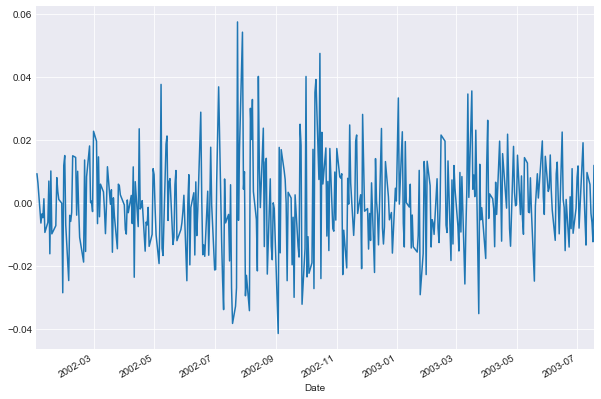

In [74]:
# Plot
data_pc_sars.plot(figsize=(10, 7), grid=True)
plt.axvline('30-Jan-20')
plt.show()

In [20]:
# Read the timelines from the CSV file
timelines = pd.read_csv('timeline.csv')


In [21]:
timelines

,pandemic_name,first_case,who_emergency,pandemic_declaration,last_date
0,covid19,11/17/19,1/30/20,3/11/20,7/31/20
1,SARS,11/16/02,3/26/03,3/26/03,7/5/03
2,Swine Flu,4/15/09,4/25/09,6/11/09,8/11/10
3,Hong Kong Flu,7/1/68,9/30/68,9/30/68,12/31/70
4,Asian Flu,2/28/57,6/30/57,6/30/57,12/31/58
5,EBOLA,12/1/13,8/8/14,8/8/14,1/14/16
6,WWII,9/1/39,9/1/39,9/1/39,9/2/45


In [22]:
for col in timelines.columns[1:]:
    timelines[col] = pd.to_datetime(timelines[col])

In [23]:
timelines

,pandemic_name,first_case,who_emergency,pandemic_declaration,last_date
0,covid19,2019-11-17,2020-01-30,2020-03-11,2020-07-31
1,SARS,2002-11-16,2003-03-26,2003-03-26,2003-07-05
2,Swine Flu,2009-04-15,2009-04-25,2009-06-11,2010-08-11
3,Hong Kong Flu,2068-07-01,2068-09-30,2068-09-30,1970-12-31
4,Asian Flu,2057-02-28,2057-06-30,2057-06-30,2058-12-31
5,EBOLA,2013-12-01,2014-08-08,2014-08-08,2016-01-14
6,WWII,2039-09-01,2039-09-01,2039-09-01,2045-09-02


In [56]:
# function to get data for SP500, oil, gold and treasury bonds 
def get_data(timeline):
    ticker_list = ['^GSPC','CL=F','GC=F','TLT']
    df = pd.DataFrame()
    for ticker in ticker_list:
        try:
            df[ticker] = pdr.get_data_yahoo(ticker,'17-Nov-19')
            # timeline.first_case.iloc[0]-dt.timedelta(days=30),
            #     timeline.last_date.iloc[0]+dt.timedelta(days=365)
        except Exception as e:
            print('sd;fl')
    return df

In [60]:
from datetime import timedelta
def get_data(tl):    
    inst_list = ['^GSPC', 'CL=F','GC=F', 'TLT']
    data = pd.DataFrame()
    for inst in inst_list:
        try:
            data[inst] = pdr.get_data_yahoo(inst, tl.first_case.iloc[0]-timedelta(days=30), 
                                        tl.last_date.iloc[0]+timedelta(days=365))['Adj Close']    
        except Exception as e:
            print('No data available for ',inst, e)

    return data

In [63]:
# data from the covid 19 pandemic to start
covid_timelines = timelines.loc[timelines.pandemic_name=='covid19']

In [61]:
data = get_data(covid_timelines)

In [62]:
data.head()

,^GSPC,CL=F,GC=F,TLT
Date,,,,
2019-10-18,2986.199951,53.779999,1488.199951,138.241058
2019-10-21,3006.719971,53.310001,1482.400024,137.201126
2019-10-22,2995.989990,54.160000,1481.699951,138.003357
2019-10-23,3004.520020,55.970001,1489.900024,138.141998
2019-10-24,3010.290039,56.230000,1498.900024,137.864716


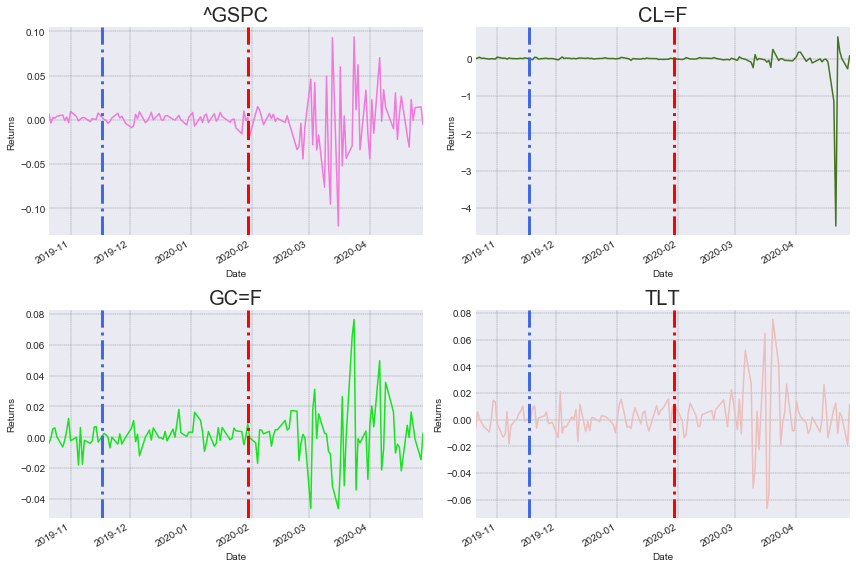

In [65]:
# Plot daily percentage change
import random
def plot_daily_pc(data, tl):
    data_pc = data.pct_change().dropna()
    fig = plt.figure(figsize=(12, 8))
    i = 0
    for col in data_pc.columns:
        # Add the subplot
        sub = fig.add_subplot(2, 2, i+1)
        i = i+1
        # Set title
        sub.set_title(col, fontsize=20)
        # Plot
        r = random.random()
        b = random.random()
        g = random.random()
        data_pc[col].plot(color=(r, g, b))
        sub.set_ylabel('Returns')
        sub.grid(which="major", color='k', linestyle='-.', linewidth=0.2)
        sub.axvline(x=tl.first_case.iloc[0], color='RoyalBlue',
                    linestyle='dashdot', linewidth=3)
        sub.axvline(x=tl.who_emergency.iloc[0], color='Red',
                    linestyle='dashdot', linewidth=3)

    plt.tight_layout()
    plt.show()
    
plot_daily_pc(data, covid_timelines)

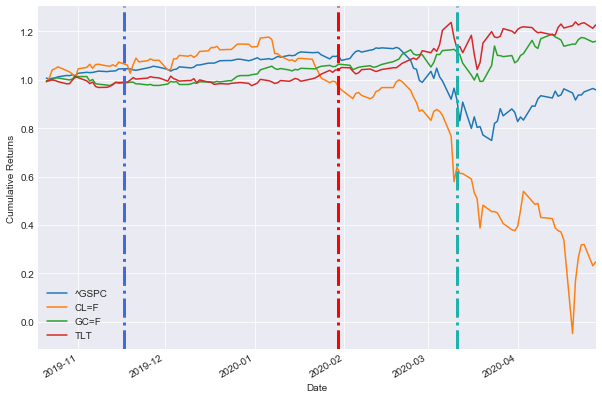

In [66]:
def plot_cumulative_returns(data,tl):
    data_cum_ret = (data.pct_change()+1).cumprod()
    data_cum_ret.plot(figsize=(10,7),grid=True)
    plt.legend(loc='best')
    plt.ylabel('Cumulative Returns')
    plt.axvline(x=tl.first_case.iloc[0],color='RoyalBlue',linestyle='dashdot',linewidth=3)
    plt.axvline(x=tl.who_emergency.iloc[0],color='Red',linestyle='dashdot',linewidth=3)
    plt.axvline(x=tl.pandemic_declaration.iloc[0],color='LightSeaGreen',linestyle='dashdot',linewidth=3)
    plt.axvspan(tl.last_date.iloc[0], tl.last_date.iloc[0]+timedelta(days=365),color='dodgerblue', alpha=0.2)
    plt.show()
    
plot_cumulative_returns(data, covid_timelines)

^GSPC    -33.924960
CL=F    -104.109372
GC=F     -11.804018
TLT      -15.727707
dtype: float64


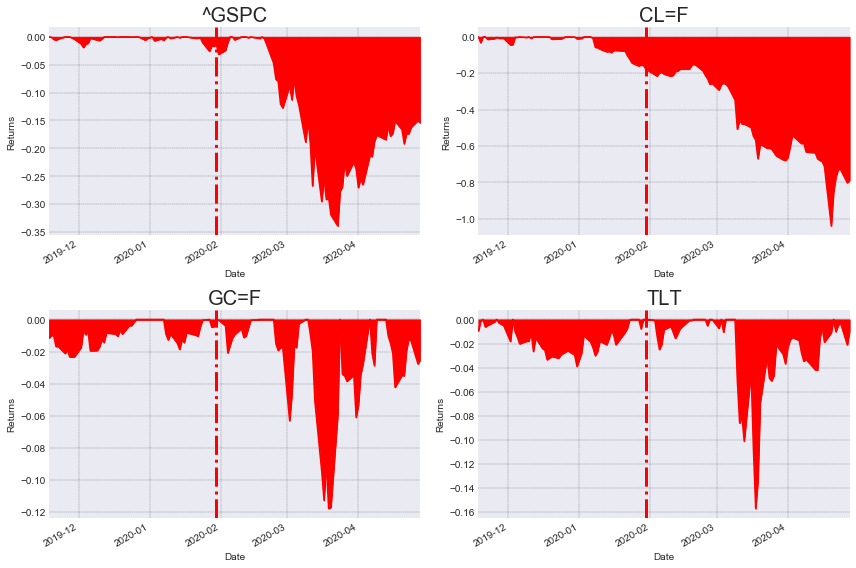

In [67]:
def calc_drawdown(data, tl):
    data_cum_ret = (data.pct_change()+1).cumprod()
    cum_rets = data_cum_ret.loc[tl.first_case.iloc[0]:tl.last_date.iloc[0]]
    # Calculate the running maximum
    running_max = np.maximum.accumulate(cum_rets.dropna())
    # Ensure the value never drops below 1
    running_max[running_max < 1] = 1
    # Calculate the percentage drawdown
    drawdown = (cum_rets)/running_max - 1
    return drawdown


def plot_drawdown(drawdown, tl):
    fig = plt.figure(figsize=(12, 8))
    i = 0
    for col in drawdown.columns:
        # Add the subplot
        sub = fig.add_subplot(2, 2, i+1)
        i = i+1
        # Set title
        sub.set_title(col, fontsize=20)
        # Plot

        drawdown[col].plot(color='r')
        sub.set_ylabel('Returns')
        sub.fill_between(drawdown.index, drawdown[col], color='red')
        sub.grid(which="major", color='k', linestyle='-.', linewidth=0.2)
        sub.axvline(x=tl.first_case.iloc[0], color='RoyalBlue',
                    linestyle='dashdot', linewidth=3)
        sub.axvline(x=tl.who_emergency.iloc[0], color='red',
                    linestyle='dashdot', linewidth=3)

    plt.tight_layout()
    plt.show()
    
drawdown = calc_drawdown(data,covid_timelines)
# Find the maximum drawdowns
print(drawdown.min()*100)
plot_drawdown(drawdown,covid_timelines)

Correlation           ^GSPC      CL=F      GC=F       TLT
^GSPC  1.000000  0.097463  0.125965 -0.500511
CL=F   0.097463  1.000000  0.028830 -0.035759
GC=F   0.125965  0.028830  1.000000  0.072897
TLT   -0.500511 -0.035759  0.072897  1.000000


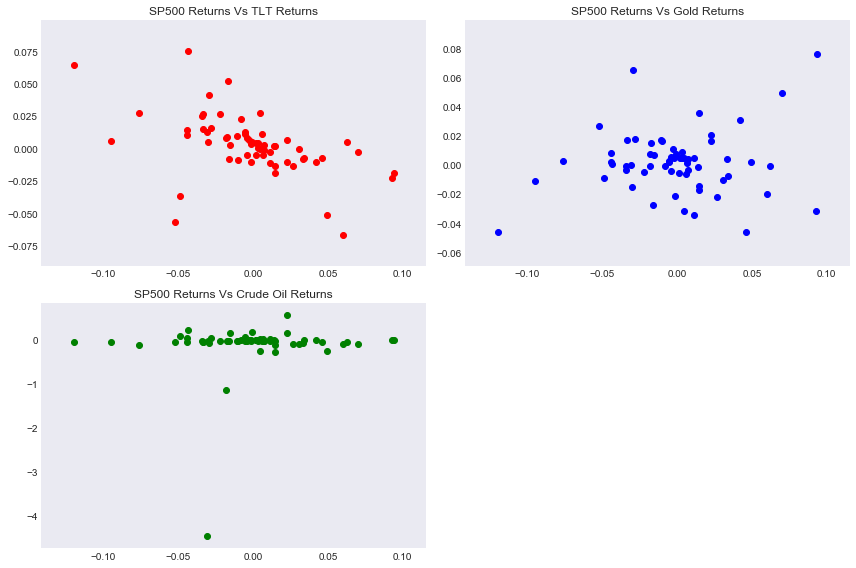

In [68]:
def plot_scatter(data, tl):
    data_pc = data.pct_change().dropna()
    temp = data_pc.loc[tl.who_emergency.iloc[0]:tl.last_date.iloc[0]]

    fig = plt.figure(figsize=(12, 8))

    sub = fig.add_subplot(2, 2, 1)
    sub.scatter(temp['^GSPC'],temp['TLT'],color='red')
    sub.set_title('SP500 Returns Vs TLT Returns')
    sub.grid()

    sub = fig.add_subplot(2, 2, 2)
    sub.scatter(temp['^GSPC'],temp['GC=F'],color='blue')
    sub.set_title('SP500 Returns Vs Gold Returns')
    sub.grid()

    sub = fig.add_subplot(2, 2, 3)
    sub.scatter(temp['^GSPC'],temp['CL=F'],color='green')
    sub.set_title('SP500 Returns Vs Crude Oil Returns')
    sub.grid()
    
    # Correlation
    sum_corr = data_pc[data_pc.columns].corr()
    print('Correlation',sum_corr)


    plt.tight_layout()
    plt.show()
    
plot_scatter(data,covid_timelines)

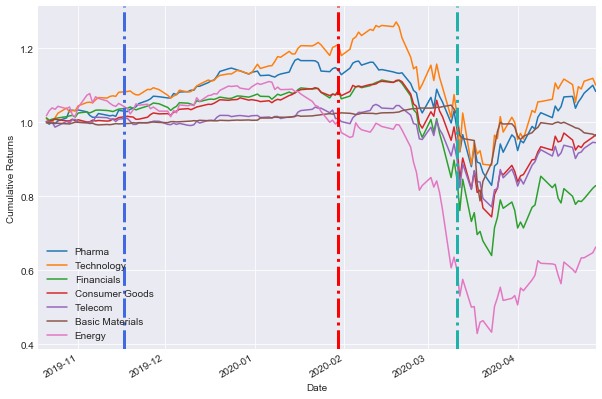

In [69]:
def plot_sector(tl):
    sector_list = ['IHE', 'IYW', 'IYF', 'IYK', 'IYZ','ITM', 'IYE']

    columns = ['Pharma', 'Technology', 'Financials', 'Consumer Goods',
               'Telecom', 'Basic Materials', 'Energy']

    sector_data = pd.DataFrame()
    for inst in sector_list:
        try:
            sector_data[inst] = pdr.get_data_yahoo(inst, tl.first_case.iloc[0]-timedelta(days=30), 
                                        tl.last_date.iloc[0]+timedelta(days=365))['Adj Close']    
        except:
            pass

    sector_data.columns = columns
    plot_cumulative_returns(sector_data, tl)
plot_sector(covid_timelines)

# When will it end?
# How will it end?
# Will markets fall more from here? And how it will move from here?
# Should I buy Gold as safe haven? How should my portfolio look?
# It is so contagious, will everyone be affected by it?
# How the earnings will be impacted and which sector will be impacted the most?